In [ ]:
#Fase 1 -Estructurar el conjunto de datos
"""
-Adquisicion de datos
-Exploracion de datos
-Preprocesamiento

Reconocer los datos de analisis para el caso de estudio, si se trata de aprendizaje sobre imágenes(Clasificación),
aprendizaje sobre texto(Clasificación),sobre variables continuas y discretas(regresión o clasificación).
""""

In [6]:
import pandas as pd

data = pd.read_csv("ds_salaries.csv")
data.sample(5)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [8]:
data["work_year"].sort_values().unique()

array([2020, 2021, 2022, 2023], dtype=int64)

In [10]:
data["count"] = 1
data.groupby("work_year").count()["count"]

work_year
2020      76
2021     230
2022    1664
2023    1785
Name: count, dtype: int64

In [12]:
#cuenta todos los datos pero seleccionando la columna "count"
counts = data.groupby("work_year").count()["count"]
years= list(counts.index)
year_weights = list(counts.values)

print(years)
print(year_weights)

[2020, 2021, 2022, 2023]
[76, 230, 1664, 1785]


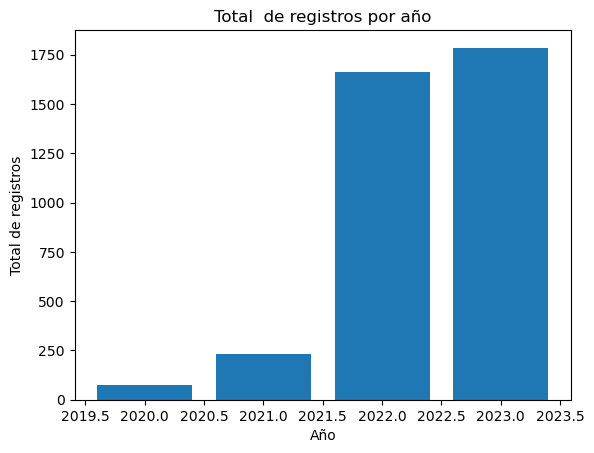

In [15]:
import matplotlib.pyplot as plt

plt.bar(years,year_weights)
plt.title("Total  de registros por año")
plt.xlabel("Año")
plt.ylabel("Total de registros")
plt.show()

In [16]:
data["experience_level"].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [18]:
data["count"] = 1
counts = data.groupby("experience_level").count()["count"]
exp_levels = list(counts.index)
exp_levels_weights = list(counts.values)

print(exp_levels)
print(exp_levels_weights)

['EN', 'EX', 'MI', 'SE']
[320, 114, 805, 2516]


In [23]:
exp_levels_weights[3]/sum(exp_levels_weights)

0.6700399467376831

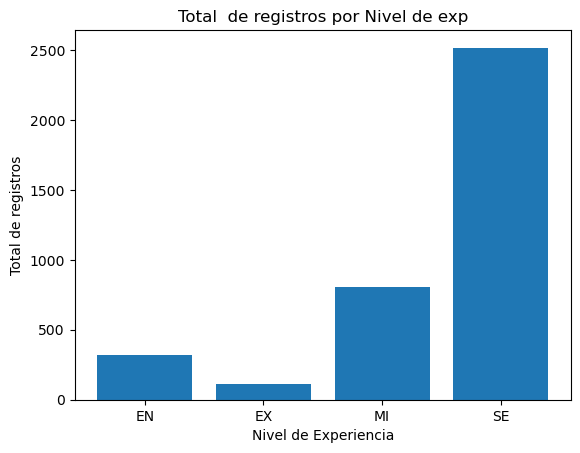

In [24]:
plt.bar(exp_levels,exp_levels_weights)
plt.title("Total  de registros por Nivel de exp")
plt.xlabel("Nivel de Experiencia")
plt.ylabel("Total de registros")
plt.show()

In [39]:
def vis_total_registros(columna):
    data["count"] = 1
    counts = data.groupby(columna).count()["count"]
    labels = list(counts.index)
    totals = list(counts.values)
    print("Labels = ",labels)
    print("Totals = ",totals)
    plt.bar(labels,totals)
    plt.title(f"Total de registros {columna}")
    plt.xlabel(columna)
    plt.ylabel("Total de registros")
    return labels,totals

Labels =  ['CT', 'FL', 'FT', 'PT']
Totals =  [10, 10, 3718, 17]


(['CT', 'FL', 'FT', 'PT'], [10, 10, 3718, 17])

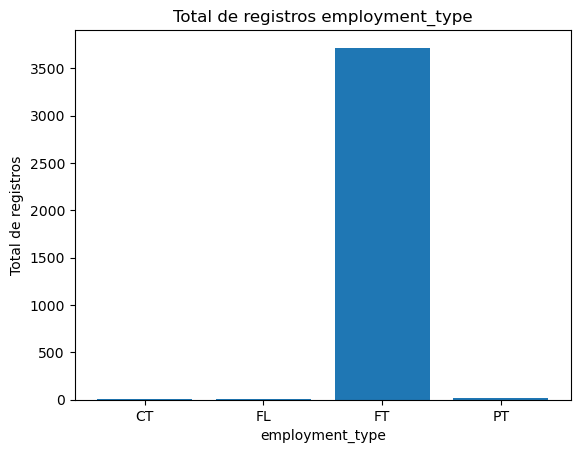

In [34]:
vis_total_registros("employment_type")

Labels =  [2020, 2021, 2022, 2023]
Totals =  [76, 230, 1664, 1785]
Labels =  ['EN', 'EX', 'MI', 'SE']
Totals =  [320, 114, 805, 2516]
Labels =  ['CT', 'FL', 'FT', 'PT']
Totals =  [10, 10, 3718, 17]
Labels =  ['AUD', 'BRL', 'CAD', 'CHF', 'CLP', 'CZK', 'DKK', 'EUR', 'GBP', 'HKD', 'HUF', 'ILS', 'INR', 'JPY', 'MXN', 'PLN', 'SGD', 'THB', 'TRY', 'USD']
Totals =  [9, 6, 25, 4, 1, 1, 3, 236, 161, 1, 3, 1, 60, 3, 1, 5, 6, 2, 3, 3224]
Labels =  [0, 50, 100]
Totals =  [1923, 189, 1643]
Labels =  ['L', 'M', 'S']
Totals =  [454, 3153, 148]


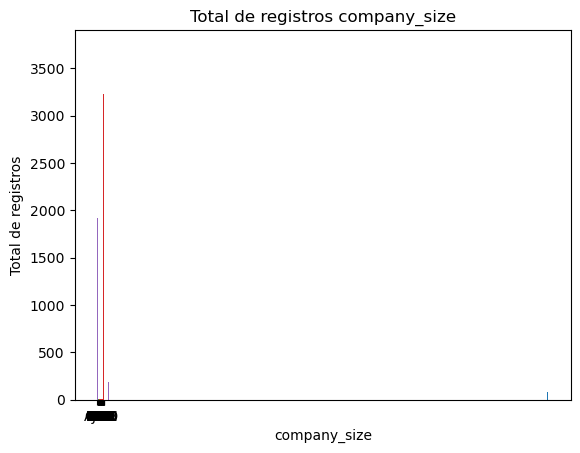

In [46]:
for columna in data.columns:
    if columna == "count":
        continue
    if len(data[columna].unique())<50:
        vis_total_registros(columna)

In [92]:
data_study = data.copy()
data_study = data_study[
    (data_study["work_year"]==2022) |
    (data_study["work_year"]==2023)]
data_study = data_study[(data_study["experience_level"] == "SE")]
data_study = data_study[(data_study["employment_type"] == "FT")]
data_study = data_study[
    (data_study["remote_ratio"]==0) |
    (data_study["remote_ratio"]==100)]
data_study = data_study[(data_study["company_size"] == "M")]
data_study = data_study[(data_study["salary_currency"] == "USD")]
data_study = data_study[(data_study["company_location"] == "US")]
data_study["remote_ratio"] = data_study["remote_ratio"] / 100
data_study["work_year"] = data_study["work_year"] - 2022
job_titles = list(data_study["job_title"].unique())
#data_study["job_title_index"] = data_study["job_title"].map(lambda job: job_titles.index(job))
for job in job_titles:
    data_study[job] = data_study["job_title"] == job
    data_study[job] = data_study[job].map(int) 
data_study = data_study[["work_year", "salary_in_usd","remote_ratio"] + job_titles]

data_study.sample(10)

,work_year,salary_in_usd,remote_ratio,Data Scientist,Data Analyst,Data Modeler,Business Intelligence Engineer,Machine Learning Engineer,Data Engineer,Computer Vision Engineer,...,Data Lead,Data Science Engineer,Cloud Database Engineer,NLP Engineer,Applied Machine Learning Scientist,Data Specialist,Data Operations Analyst,Machine Learning Manager,ETL Developer,Head of Data
948,1,95000,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
418,1,145000,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201,1,115000,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1363,1,126000,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1885,0,201000,1.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1098,1,200160,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111,1,203000,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2127,0,70000,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1648,1,180000,0.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
309,1,75000,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

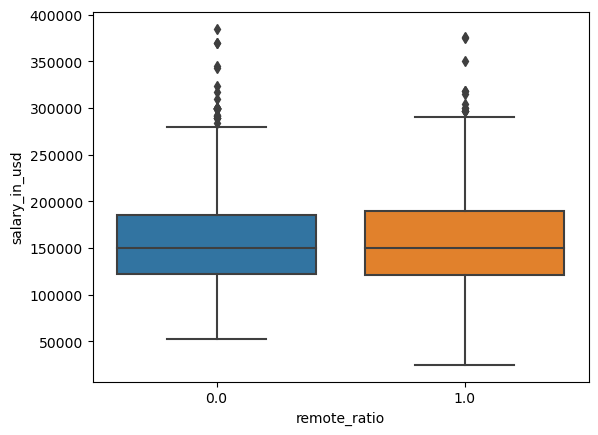

In [93]:
import seaborn as sns

sns.boxplot(x=data_study["remote_ratio"],y=data_study["salary_in_usd"])

<Axes: xlabel='work_year', ylabel='salary_in_usd'>

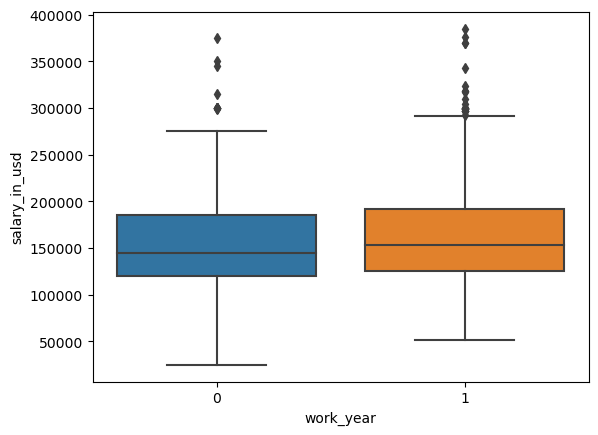

In [94]:
sns.boxplot(x=data_study["work_year"],y=data_study["salary_in_usd"])

In [95]:
sns.boxplot(x=data_study["job_title"],y=data_study["salary_in_usd"])
plt.xticks(rotation=90)
plt.show()

KeyError: 'job_title'

In [96]:
#Fase 2 - Modelo de aprendizaje
"""
-Conjunto de entrenamiento
-Conjunto de pruebas
-Modelo de Clasificación/Regresión
-Ajuste/Entrenamiento
-Pruebas de validación
"""

'\n-Conjunto de entrenamiento\n-Conjunto de pruebas\n-Modelo de Clasificación/Regresión\n-Ajuste/Entrenamiento\n-Pruebas de validación\n'

In [117]:
X = data_study[["work_year"] + job_titles].values
X

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [118]:
Y = data_study["remote_ratio"].values
Y

array([0., 0., 1., ..., 1., 1., 1.])

In [119]:
X.shape, Y.shape

((2078, 38), (2078,))

In [123]:
from sklearn.model_selection import train_test_split

X_train,X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2)
X_train.shape,X_test.shape, Y_train.shape, Y_test.shape

((1662, 38), (416, 38), (1662,), (416,))

In [131]:
from sklearn.linear_model import LinearRegression

reg1 = LinearRegression()

reg1.fit(X_train,Y_train)
reg1.score(X_test,Y_test)

0.07825391141660065

In [132]:
from sklearn.svm import SVR

reg2 = SVR()

reg2.fit(X_train,Y_train)
reg2.score(X_test,Y_test)

-0.21145867117730988

In [135]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV()

clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

C:\Users\Aula E-2\anaconda3\envs\ml-env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Aula E-2\anaconda3\envs\ml-env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

0.6370192307692307

In [133]:
from sklearn.linear_model import Perceptron

clf1 = Perceptron()
clf1.fit(X_train,Y_train)
clf1.score(X_test,Y_test)

0.5649038461538461

In [134]:
from sklearn.ensemble import RandomForestClassifier

clf2 = Perceptron()
clf2.fit(X_train,Y_train)
clf2.score(X_test,Y_test)

0.5649038461538461

In [1]:
#Fase 3 - Reportes y resultados
"""
-Validacion de Aprendizaje
Generar graficas de desempeño
-Reporte de metricas
"""

In [136]:
len(X[0])


38

In [143]:
import numpy as np
clf.predict([
    [0,1] + list(np.zeros(36)),
    [0] + list(np.zeros(15)) + [1] + list(np.zeros(21)),
    [1,1] + list(np.zeros(36)),
    [1] + list(np.zeros(15)) + [1] + list(np.zeros(21))
])

array([1., 1., 0., 1.])

In [147]:
job_titles[0], job_titles[16]

('Data Scientist', 'Machine Learning Scientist')